<a href="https://colab.research.google.com/github/mukul-mschauhan/big-mart/blob/main/Statistics_Day_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### About P Value

* P Value is the probability of the H0 being correct given the test statistic.
* If the PValue > Alpha, We can say that the results are not statistically significant meaning that we Fail to Reject the Ho.

* If the PValue on the other hand, is less than Alpha, we say that the results are statistically significant and we Reject the Ho.

* In other words, a smaller PValue means that there is a stronger evidence in the favour of Ha.

* The lower the PValue, greater is the Statistical Significance and vice-versa.

The training institute Nature Learning claims that the students trained in their institute have overall better performance than the students trained in their competitor institute Speak Global Learning. We have a sample data of 500 students from each institute along with their **total score** collected from independent normal populations. Frame a hypothesis and test the Nature Learning's claim with 99% confidence.


* **Step 01: Null Hypothesis**
Ho: Total Score(NL) = Total Score(Speak GL) or Mew1 - Mew2 = 0 or Mew1 = Mew2

* **Step 02: Define the Alternate Hypothesis**
H1: Total Score(NL) > Total Score(Speak GL) # Right Tail Test...

* **Step 03: Define the Level of Significance and Alpha**
We will use 0.99 CL to draw our claims. i.e. the alpha will be 0.01

In [3]:
# Import the Datasets

student = pd.read_csv("/content/StudentsPerformance.csv")
student.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning
2,female,group B,standard,none,64,71,56,191,Nature Learning
3,male,group A,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,standard,none,75,66,51,192,Nature Learning


In [4]:
# filter the data with institute's name

nl_scores = student.loc[student["training institute"] == "Nature Learning",
                        "total score"]

speakgl_scores = student.loc[student["training institute"] == "Speak Global Learning",
                        "total score"]

In [8]:
# Preliminary Tests
# Normality test
# Ho: Data is Normal
# Ha: Ho is False

stats.shapiro(nl_scores), stats.shapiro(speakgl_scores)
# Result is Data is Normal

#Equality of Variance::Levene's test
# Ho: Variance is Equal
# Ha: Unequal Variance.

stats.levene(nl_scores, speakgl_scores)

LeveneResult(statistic=0.6422721347822817, pvalue=0.42307998325221574)

In [9]:
# Two Sample Independent T Test
stats.ttest_ind(nl_scores, speakgl_scores)

TtestResult(statistic=0.15125511253949914, pvalue=0.8798050443387677, df=998.0)

A survey claims that in a math test female students tend to score fewer marks than the average marks of 75 out of 100. Consider a sample of 24 female students and perform a hypothesis test to check the claim with 90% confidence.


* **Step01: Define the Null Hypothesis**
* Ho: Avg Marks >= 75 | Avg Marks = 75 (Both the Exp are OK)


* **Step02: Define the Alternate Hypothesis**
* Ho: Avg Marks < 75

Note: Check the Claim at 0.90

In [17]:
maths = pd.read_csv("/content/mathscore_1ttest.csv")
maths.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group C,standard,none,60,72,74,206,Nature Learning
1,female,group C,standard,none,59,72,68,199,Nature Learning
2,female,group E,standard,none,100,100,100,300,Speak Global Learning
3,female,group D,standard,none,69,74,74,217,Speak Global Learning
4,female,group A,free/reduced,none,47,59,50,156,Speak Global Learning


In [19]:
# Normality Test
# Ho: Data is Normal
# Ha: Data is not Normal

stats.shapiro(maths["math score"]) # Data is Normal

ShapiroResult(statistic=0.9368311300007071, pvalue=0.13859843948920092)

In [20]:
# One Sample TTest
stats.ttest_1samp(maths["math score"], popmean = 75,
                  alternative = "less")

TtestResult(statistic=-3.6067380757023204, pvalue=0.0007426613957678669, df=23)

The teachers' association claims that the total score of the students who completed the test preparation course is different than the total score of the students who have not completed the course. The sample data consists of 15 students who completed the course and 18 students who have not completed the course. Test the association's claim with ⍺ = 0.05. **totalmarks_2ttest**


* **Step01: Define the Null Hypothesis**
* Ho: TotalScore(Completed Test Prep) = Total Score(Not Completed the Test Prep)


* **Step02: Define the Alternate Hypothesis**
* Ha: TotalScore(Completed Test Prep) != Total Score(Not Completed the Test Prep)

Note: This is going to be a two tail test. Because it is a Sample Dataset, therefore, we will apply t-Test.

Note: Check the Claim at 0.95

In [21]:
testprep = pd.read_csv("/content/totalmarks_2ttest.csv")
testprep.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,male,group E,standard,completed,84,83,78,245,Speak Global Learning
1,male,group C,free/reduced,completed,79,77,75,231,Speak Global Learning
2,male,group A,standard,none,91,96,92,279,Nature Learning
3,female,group B,free/reduced,completed,76,94,87,257,Speak Global Learning
4,male,group A,standard,completed,46,41,43,130,Nature Learning


In [22]:
# Split the Data in Completed and None...
completed = testprep.loc[testprep["test preparation course"]=="completed",
                         "total score"]

none = testprep.loc[testprep["test preparation course"]=="none",
             "total score"]

In [24]:
# Normality Test and Levene Test
# Ho: Data is Normal
# Ha: Data is not Normal
stats.shapiro(completed), stats.shapiro(none)
# Conclusion: Data is Normal

# levene test
# Ho: Variance is Equal
# Ha: Ho is False
stats.levene(completed, none)
# Equality of Variance Prevails.
# Since the PValue > Alpha, We Fail to Reject the Null Hypothesis

LeveneResult(statistic=0.045113770764648356, pvalue=0.8331854285659768)

In [25]:
stats.ttest_ind(completed, none)
# Fail to Reject....there is no impact of Test prep Course on
# the Scores

TtestResult(statistic=1.4385323319823262, pvalue=0.16030339806989594, df=31.0)

### Two Sample T Test

* Two Sample T-Test can be divided in two parts. One is called **Independent Sample TTTest**

* Independent Samples/Sample T-Tests are the T-Tests where the Samples are not Related. They are independent in Nature. For e.g. The Doctor while testing a drug, gave medicine to one group and placebo to other group. These groups are not related.

* VLCC - VLCC tried a particular diet plan for one group and the same diet plan is tried in another city. Therefore, the people involved are not related with each other. The results measured will be an example of Independent Sample T-Test.


* **T-Test Related aka Paired T-Test** is another type of a T Test where we check the Before and After Effect o the same sample. The Subject target for the test is same. It is to ensure that we see some cause and effect relationship...


A training institute wants to check if their writing training program was effective or not. 17 students are selected to check the hypothesis. Consider 0.05 as the level of significance.


* **Step01: Define the Null Hypothesis**
* Ho: Training Program has no Effect on the Writing Skills of the People. Mean Difference between the Scores = 0. Mean(scores_before) = Mean(score_after)


* **Step02: Define the Alternate Hypothesis**
* Ha: Mean(scores_after) > Mean(score_before). This means that the Scores have improved.

Note: This is going to be a Right Tail test.

Note: Because it is a Sample Dataset of before and after effect, therefore, we will apply Paired t-Test.

Note: Check the Claim at 0.95

In [27]:
writing = pd.read_csv("/content/WritingScores.csv")
writing.head()

,score_before,score_after
0,59,50
1,62,67
2,76,92
3,32,75
4,61,98


In [30]:
# Normality Test and Levene Test

stats.shapiro(writing.score_before), stats.shapiro(writing.score_after)
stats.levene(writing.score_before, writing.score_after)

LeveneResult(statistic=0.4612497504491918, pvalue=0.5019236019309768)

In [33]:
# T Test Related to check the effect of Training Program on Wrting..
stats.ttest_rel(writing.score_before, writing.score_after,
                alternative = "greater")

# We Fail to reject as the PValue > Alpha and hence, there
# is no effect or no difference in the scores before and after

TtestResult(statistic=-1.4394882729049499, pvalue=0.9153549355186007, df=16)

An energy drink distributor claims that a new advertisement poster, featuring a life-size picture of a well-known athlete, will increase the product sales in outlets by an average of 50 bottles in a week. For a random sample of 10 outlets, the following data was collected. Test that the null hypothesis that there the advertisement was effective in increasing sales. Test the hypothesis using critical region technique. Use α = 0.05.

Given data:
    * sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
    * sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

In [51]:
# Ho: That there is no impact of celebrity player on the Sales
# Ha: Sales Increases after Signing the Celebrity player
# Since Sales increases after bringing the player, it has to be a
# Right Tail test

sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
sales_after = [142, 135, 131, 141, 137, 136,
               149, 149, 148]

In [52]:
# Normality Test and Levene Test
# Ho: Data is Normal
# Ha: Data is Not Normal

stats.shapiro(sales_before), stats.shapiro(sales_after), stats.levene(sales_before,sales_after)

(ShapiroResult(statistic=0.9187210070795814, pvalue=0.3817557409072696),
 ShapiroResult(statistic=0.9118873884322758, pvalue=0.3293089080258549),
 LeveneResult(statistic=0.09467455621301783, pvalue=0.7622856002535852))

In [53]:
# Related T Test
stats.ttest_rel(sales_before, sales_after, alternative = "greater")

# Since the Pvalue > 0.05, We Fail to Reject the Ho.
# It means that there is no effect of the Celebrity Player on Sales

TtestResult(statistic=-45.485416090468796, pvalue=0.9999999999698577, df=8)

In [49]:
|stats.mannwhitneyu(sales_before, sales_after,
                   alternative = "greater")


MannwhitneyuResult(statistic=23.5, pvalue=0.9390545042516195)

In [54]:
np.mean(sales_before), np.mean(sales_after)

(40.666666666666664, 140.88888888888889)

In [55]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


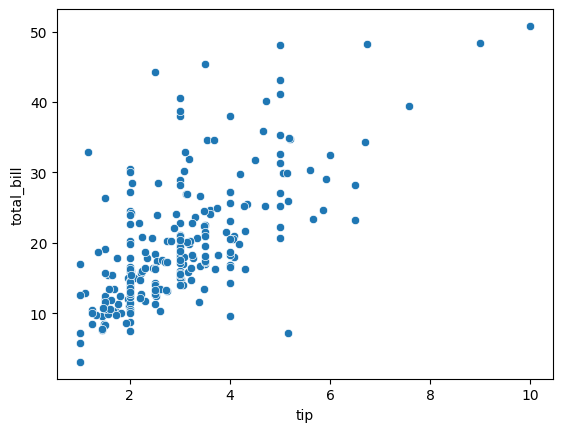

In [57]:
sns.scatterplot(x = "tip", y = "total_bill", data = tips)
plt.show()

In [59]:
# Ho: Total Bill and Tip are Independent. There is no Relation
# Ha: Ho is False. They are Related

stats.shapiro(tips.total_bill), stats.shapiro(tips.tip),
stats.levene(tips.total_bill, tips.tip)

LeveneResult(statistic=191.45758891439695, pvalue=6.0094250887680525e-37)

In [60]:
# Non parametric test
stats.mannwhitneyu(tips.total_bill, tips.tip)
# Since the PValue < 0.05, we reject the Ho
# meaning total Bill and Tip are related columns

MannwhitneyuResult(statistic=59401.5, pvalue=9.761675178682248e-81)

In [61]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [62]:
# Considering tip as a Target Variable,
# We want to find out if the Tip Paid by Males = Tip Paid by Females

males = tips.loc[tips.sex == "Male", "tip"]
females = tips.loc[tips.sex == "Female", "tip"]

stats.shapiro(males), stats.shapiro(females), stats.levene(males, females)

(ShapiroResult(statistic=0.8758690617789388, pvalue=3.7084828294513925e-10),
 ShapiroResult(statistic=0.9567775372726819, pvalue=0.005448280473692281),
 LeveneResult(statistic=1.9909710178779405, pvalue=0.1595236359896614))

In [64]:
stats.mannwhitneyu(males, females, alternative = "greater")

MannwhitneyuResult(statistic=7289.5, pvalue=0.19167724679681963)

<Axes: xlabel='sex', ylabel='tip'>

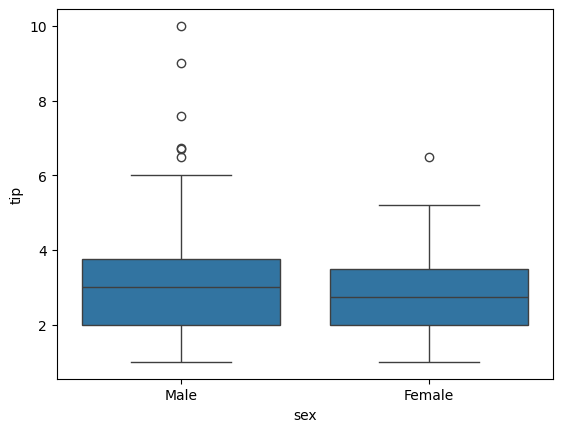

In [66]:
sns.boxplot(x = "sex", y = "tip", data = tips)